In [1]:
import tensorflow as tf 

In [3]:
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt 

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

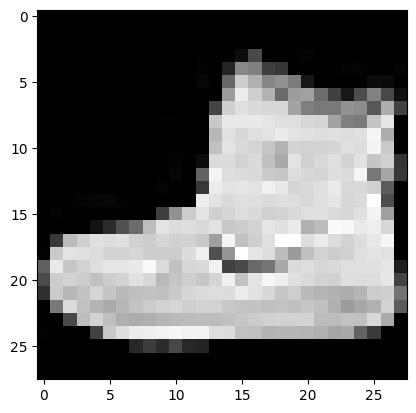

In [9]:
plt.imshow(x_train[0] , cmap='gray')

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [12]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255 

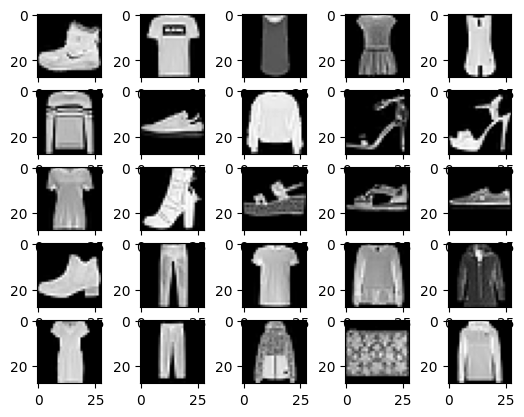

In [16]:
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_train[i-1] , cmap = 'gray') ## first 25 images 

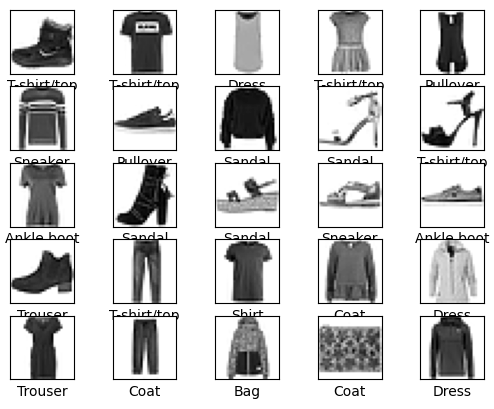

In [28]:
for i in range(1,26):

    plt.subplot(5,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i-1] , cmap = plt.cm.binary) 
    plt.xlabel(class_names[y_train[i]])
    
plt.show()

In [25]:
class_names[y_train[0]]

'Ankle boot'

In [30]:
np.sqrt(28*28*10) ### 10 masti 

88.54377448471462

In [32]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [34]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)) , 
    keras.layers.Dense(89 , activation = 'relu') ,
    keras.layers.Dense(10 , activation = 'sigmoid') ,
    
])

In [36]:
model.compile(
    optimizer = 'sgd' ,
    loss = 'SparseCategoricalCrossentropy',
    metrics = ['accuracy'])

In [38]:
model.fit(x_train_scaled , y_train , epochs = 10 )

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.5130 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4673 - accuracy: 0.8388
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4414 - accuracy: 0.8467
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4223 - accuracy: 0.8537
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4092 - accuracy: 0.8583
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3972 - accuracy: 0.8622
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3878 - accuracy: 0.8643
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3790 - accuracy: 0.8671
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3717 - accuracy: 0.8704
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.36

In [41]:
model.evaluate(x_test_scaled , y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.4054 - accuracy: 0.8558


[0.4053576588630676, 0.8557999730110168]

In [42]:
predictions = model.predict(x_test_scaled)

313/313 [==============================] - 1s 2ms/step


In [45]:
predictions[0]

array([0.01367877, 0.00169586, 0.02049955, 0.01360856, 0.01506373,
       0.99526453, 0.11265981, 0.99428415, 0.79298395, 0.99927163],
      dtype=float32)

In [44]:
np.argmax(predictions[0])

9

In [46]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

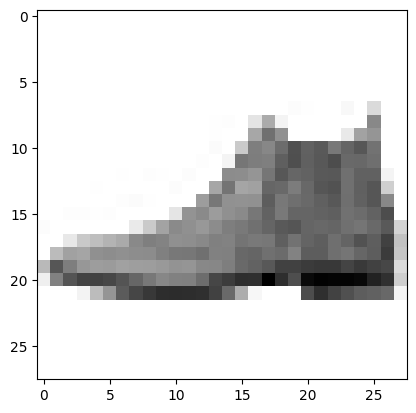

In [47]:
plt.imshow(x_test_scaled[0] , cmap = plt.cm.binary)

In [48]:
predictions[0]

array([0.01367877, 0.00169586, 0.02049955, 0.01360856, 0.01506373,
       0.99526453, 0.11265981, 0.99428415, 0.79298395, 0.99927163],
      dtype=float32)

In [50]:
np.max(predictions[0]) * 100


99.92716312408447

In [51]:
#99.27 % confidence its boot 